In [21]:
import pandas as pd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Merge all 12 months

In [22]:
files=[file for file in os.listdir('./Sales_Data')]#only list of file names

all_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_data=pd.concat([all_data,df])

all_data.to_csv("data.csv",index=False)

In [23]:
df=pd.read_csv("data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### 2nd way of merge

In [24]:
files = os.path.join("/Users/muhammedmurshid/data_science/examples/sales/Sales_Data", "Sales*.csv")#list of path of files

files = glob.glob(files)

df1 = pd.concat(map(pd.read_csv, files), ignore_index=True)

df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# clean up the data

###### drop Nan

In [25]:
nan_datas=df[df.isna().any(axis=1)]
nan_datas

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df['Order Date'][df['Order Date'].isna()]

264       NaN
648       NaN
680       NaN
1385      NaN
1495      NaN
         ... 
185795    NaN
185868    NaN
185887    NaN
185960    NaN
186580    NaN
Name: Order Date, Length: 545, dtype: object

In [27]:
df=df.dropna(how="all")

### add month col

In [28]:
##adding month column
#del df['Month']
df.insert(5,"Month",'')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,,"43 Hill St, Atlanta, GA 30301"


In [29]:
df['Month']=df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,12,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,12,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,12,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,12,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,12,"43 Hill St, Atlanta, GA 30301"


In [30]:
df=df[df['Month'].str[0:2]!='Or']

In [31]:
df['Month']=pd.to_numeric(df['Month']) 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,12,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,12,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,12,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,12,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,12,"43 Hill St, Atlanta, GA 30301"


### add sales col

In [32]:

df.insert(4,'Sales','')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,,12/30/19 00:01,12,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,,12/29/19 07:03,12,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,,12/12/19 18:21,12,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,,12/22/19 15:13,12,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,,12/18/19 12:38,12,"43 Hill St, Atlanta, GA 30301"


In [33]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered']) 

In [34]:
df['Price Each']=pd.to_numeric(df['Price Each'])

#### Sales updated

In [35]:
df['Sales']=df['Quantity Ordered']*df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,12,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,12,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,"43 Hill St, Atlanta, GA 30301"


#### Sales value check

In [36]:
df[['Quantity Ordered','Price Each','Sales']][df['Quantity Ordered']>=5]

,Quantity Ordered,Price Each,Sales
672,7,2.99,20.93
840,5,2.99,14.95
1107,5,2.99,14.95
1335,6,2.99,17.94
2684,5,3.84,19.20
...,...,...,...
183422,5,2.99,14.95
183485,5,3.84,19.20
183712,5,3.84,19.20
184051,6,2.99,17.94


#### add city col

In [37]:
df.insert(7,'City','')

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,12,,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,12,,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,,"43 Hill St, Atlanta, GA 30301"


### Fill only city using extract

In [39]:
newdf['City'] = newdf['Purchase Address'].str.extract('\w*,+ ([a-zA-Z, ]+)', expand=True)
newdf.head()

NameError: name 'newdf' is not defined

### Fill only city using apply

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,12,,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,12,,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,,"43 Hill St, Atlanta, GA 30301"


In [41]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City']=df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})" )
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,12,New York City (NY),"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,12,New York City (NY),"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,New York City (NY),"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,San Francisco (CA),"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,Atlanta (GA),"43 Hill St, Atlanta, GA 30301"


In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,12,New York City (NY),"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,12,New York City (NY),"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,New York City (NY),"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,San Francisco (CA),"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,Atlanta (GA),"43 Hill St, Atlanta, GA 30301"


#### Q1: best month for sale?how much earned?

In [43]:
sale=df.groupby('Month').sum()
sale

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [44]:
sale[sale['Sales']==sale['Sales'].max()]

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34


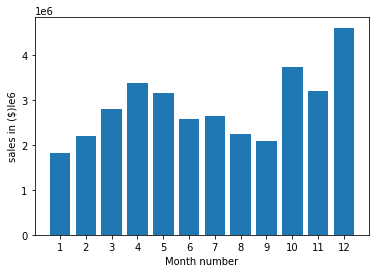

In [45]:
Month=range(1,13)
plt.bar(Month,sale['Sales'])
plt.xticks(Month)
plt.xlabel('Month number')
plt.ylabel('sales in ($)le6')
plt.show()

#### Q2: which city had the highest number of sales

In [46]:
citysale=df.groupby('City').sum()
citysale

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


In [47]:
citysale[citysale['Sales']==citysale['Sales'].max()]

,Quantity Ordered,Price Each,Sales,Month
City,,,,
San Francisco (CA),50239,8211461.74,8262203.91,315520


NameError: name 'cities' is not defined

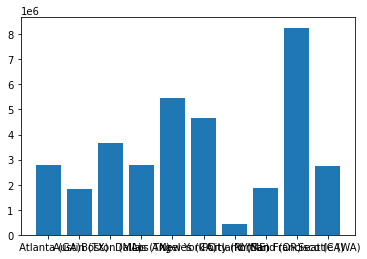

In [48]:
#cities=[city for city,df in df.groupby('City')]     #list Comprehension 
city=citysale.index.values.tolist()                  #index to list
plt.bar(city,citysale['Sales'])
plt.xticks(cities,rotation='vertical',size=10)
plt.xlabel('Cities')
plt.ylabel('Sales in ($)le6')
plt.show()

In [49]:
sorted_citysale=citysale.sort_values('Sales')
sorted_citysale

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Portland (ME),2750,447189.25,449758.27,17144
Austin (TX),11153,1809873.61,1819581.75,69829
Portland (OR),11303,1860558.22,1870732.34,70621
Seattle (WA),16553,2733296.01,2747755.48,104941
Dallas (TX),16730,2752627.82,2767975.40,104620
Atlanta (GA),16602,2779908.20,2795498.58,104794
Boston (MA),22528,3637409.77,3661642.01,141112
New York City (NY),27932,4635370.83,4664317.43,175741
Los Angeles (CA),33289,5421435.23,5452570.80,208325


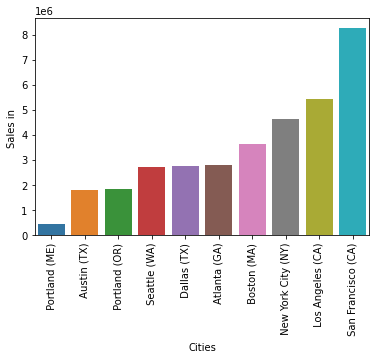

In [50]:
xvalue=list(sorted_citysale.index)
chart=sns.barplot(x=xvalue,y='Sales',data=sorted_citysale)
plt.xticks(rotation='vertical'),
chart.set(xlabel='Cities',ylabel="Sales in ")
plt.show()

### Q: what time should we display ads for maximise likelihood of customers to bying prodect?

#### order date to datetime dtype

In [51]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-30 00:01:00,12,New York City (NY),"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,2019-12-29 07:03:00,12,New York City (NY),"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,12,New York City (NY),"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,12,San Francisco (CA),"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,12,Atlanta (GA),"43 Hill St, Atlanta, GA 30301"


In [52]:
df.insert(6,'Hour','')

In [53]:
df['Hour']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,City,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-30 00:01:00,0,12,New York City (NY),"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,2019-12-29 07:03:00,7,12,New York City (NY),"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,18,12,New York City (NY),"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,15,12,San Francisco (CA),"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,12,12,Atlanta (GA),"43 Hill St, Atlanta, GA 30301"


#### most rush hours

In [54]:
x_hours=[Hour for Hour,df in df.groupby('Hour')]
row_count=df.groupby('Hour').count()
sort=row_count.sort_values('Sales')
sort.tail()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
Hour,,,,,,,,,
20,12228,12228,12228,12228,12228,12228,12228,12228,12228
18,12280,12280,12280,12280,12280,12280,12280,12280,12280
11,12411,12411,12411,12411,12411,12411,12411,12411,12411
12,12587,12587,12587,12587,12587,12587,12587,12587,12587
19,12905,12905,12905,12905,12905,12905,12905,12905,12905


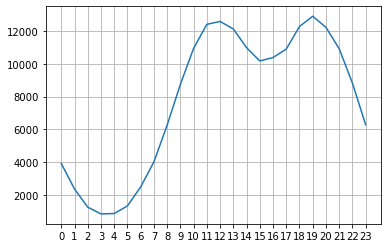

In [55]:
Hour=[Hour for Hour,df in df.groupby('Hour')]

lc=plt.plot(x_hours,row_count['Sales'])
plt.xticks(Hour)
plt.grid()
plt.show()

### Q What prodects are most often sold together

### way 1

In [330]:
odf=df.copy()
odf.insert(1,'count',0)

In [331]:
odf['pr']= odf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#grp_cnt2= odf.groupby('Order ID').Product.agg([('count', 'count'), ('Purchase Address', ', '.join)]) 

In [368]:
odf['count']=odf['pr'].apply(lambda x: len(x.split(',')))
odf=odf[odf['count']==2]
odf=odf.drop_duplicates()

In [369]:
odf1=odf.groupby('pr').count()
odf1=odf1.sort_values('count')
odf1.tail(10)

,Order ID,count,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,City,Purchase Address
pr,,,,,,,,,,,
"Lightning Charging Cable,USB-C Charging Cable",110,110,110,110,110,110,110,110,110,110,110
"Vareebadd Phone,Bose SoundSport Headphones",120,120,120,120,120,120,120,120,120,120,120
"Vareebadd Phone,Wired Headphones",208,208,208,208,208,208,208,208,208,208,208
"Google Phone,Bose SoundSport Headphones",322,322,322,322,322,322,322,322,322,322,322
"iPhone,Apple Airpods Headphones",572,572,572,572,572,572,572,572,572,572,572
"Google Phone,Wired Headphones",606,606,606,606,606,606,606,606,606,606,606
"Vareebadd Phone,USB-C Charging Cable",624,624,624,624,624,624,624,624,624,624,624
"iPhone,Wired Headphones",722,722,722,722,722,722,722,722,722,722,722
"Google Phone,USB-C Charging Cable",1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712


## way 2

In [370]:
w2df=df.copy()
#w2df=df[df['Order ID'].duplicated(keep=False)]

In [371]:
w2df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [372]:
w2df=w2df[['Order ID','Grouped']].drop_duplicates()
w2df.head()

,Order ID,Grouped
0,295665,Macbook Pro Laptop
1,295666,LG Washing Machine
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable


In [375]:
from itertools import combinations
from collections import Counter
from itertools import permutations

count=Counter()

for row in w2df['Grouped']:
    row_list=row.split(',')
    func(row_list)
    count.update(Counter(permutations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1015),
 (('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('USB-C Charging Cable', 'Google Phone'), 999),
 (('iPhone', 'Wired Headphones'), 462),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Wired Headphones', 'Google Phone'), 423),
 (('iPhone', 'Apple Airpods Headphones'), 373),
 (('Apple Airpods Headphones', 'iPhone'), 373)]

In [380]:
w2df

,Order ID,Grouped
0,295665,Macbook Pro Laptop
1,295666,LG Washing Machine
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable
...,...,...
186845,222905,AAA Batteries (4-pack)
186846,222906,27in FHD Monitor
186847,222907,USB-C Charging Cable
186848,222908,USB-C Charging Cable


## Q what product sold the most?

In [410]:
msp=df.copy()

In [411]:
msp.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,City,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-30 00:01:00,0,12,New York City (NY),"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,2019-12-29 07:03:00,7,12,New York City (NY),"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,18,12,New York City (NY),"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,15,12,San Francisco (CA),"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,12,12,Atlanta (GA),"43 Hill St, Atlanta, GA 30301"


In [448]:
msp=msp.groupby('Product').sum()

In [446]:
#msp=msp.sort_values("Quantity Ordered")

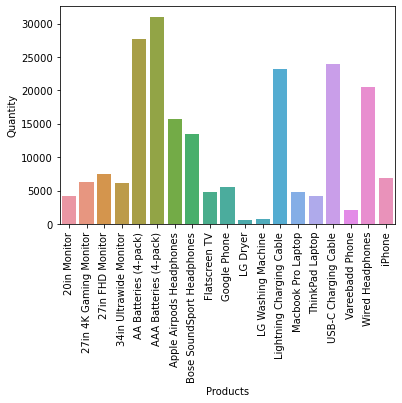

In [449]:
xval=list(msp.index)

chart=sns.barplot(x=xval,y='Quantity Ordered',data=msp)
plt.xticks(rotation=90)
chart.set(xlabel='Products',ylabel='Quantity')
plt.show()

In [452]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,City,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-30 00:01:00,0,12,New York City (NY),"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,2019-12-29 07:03:00,7,12,New York City (NY),"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,18,12,New York City (NY),"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,15,12,San Francisco (CA),"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,12,12,Atlanta (GA),"43 Hill St, Atlanta, GA 30301"


In [482]:

price=df.groupby('Product').mean()['Price Each']

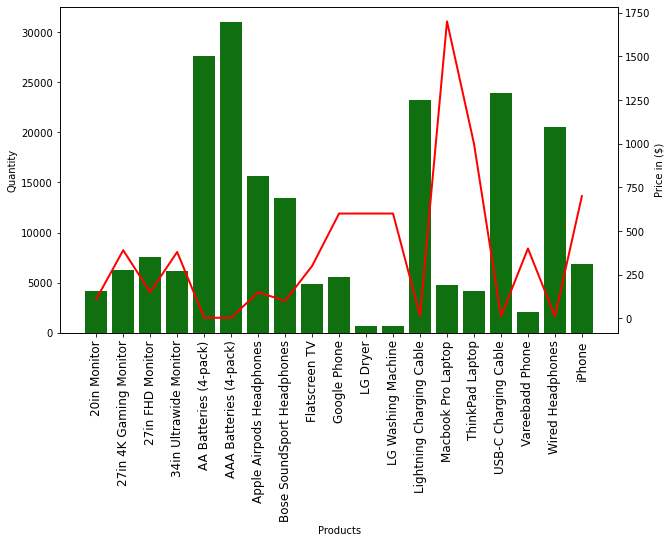

In [513]:
plt.figure(figsize=(10,6))
xval=list(msp.index)
x2=list(price.index)


ax=sns.barplot(x=xval,y='Quantity Ordered',data=msp,color='g')

plt.xticks(rotation=90,size=12)
ax.set(xlabel='Products',ylabel='Quantity')

ax2=ax.twinx()
sns.lineplot(x=x2,y=price,data=price,ax=ax2,lw=2,color='r')
ax2.set(ylabel='Price in ($)')

plt.show()